In [1]:
%matplotlib inline

# Schrödinger Wavefunction

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from positronium.wavefunction import radial_wf, wf

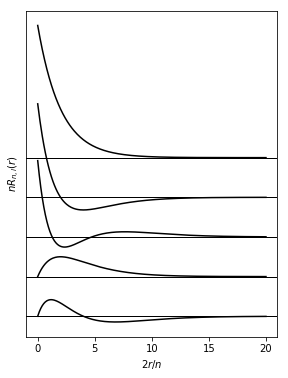

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(4.5, 6), sharex=True)

yoffset = 0.6
for i, (n, l) in enumerate([(3, 1), (2, 1), (3, 0), (2, 0), (1, 0)]):
    rad = radial_wf(n, l)
    rvals = np.linspace(0, 10 * n, 301)
    ax.plot(2.0 * rvals / n, i * yoffset + n * rad(rvals), c='k')
    ax.axhline(i*yoffset, lw=1, c='k')

ax.set_yticks([])
ax.set_ylabel(r'$n R_{n,l}(r)$')
ax.set_xlabel(r'$2 r / n$')
plt.show()

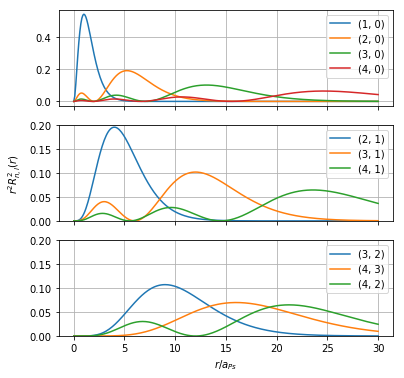

In [4]:
rvals = np.linspace(0, 30, 301)

fig, axes = plt.subplots(3, 1, figsize=(6, 6), sharex=True)
for n, l in[(1, 0), (2, 0), (3, 0), (4, 0)]:
    rad = radial_wf(n, l)
    axes[0].plot(rvals, (rvals * rad(rvals))**2.0, label=(n, l))

for n, l in[(2, 1), (3, 1), (4, 1)]:
    rad = radial_wf(n, l)
    axes[1].plot(rvals, (rvals * rad(rvals))**2.0, label=(n, l))

for n, l in[(3, 2), (4, 3), (4, 2)]:
    rad = radial_wf(n, l)
    axes[2].plot(rvals, (rvals * rad(rvals))**2.0, label=(n, l))
    
for ax in axes:
    ax.legend()
    ax.grid()

axes[1].set_ylim(0, 0.5)
axes[1].set_ylim(0, 0.2)
axes[2].set_ylim(0, 0.2)

axes[1].set_ylabel(r"$r^2 R_{n,l}^2 (r)$")
axes[2].set_xlabel(r'$r / a_{Ps}$')
plt.show()

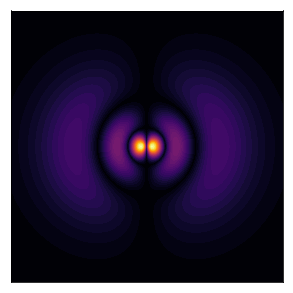

In [5]:
# quantum state
n = 4
l = 1
m = 1

# spatial coords
xrng = np.linspace(-10, 10, 301)
yrng = np.linspace(-10, 10, 301)
X, Y = np.meshgrid(xrng, yrng)
rho = np.sqrt(X**2 + Y**2)
theta = np.arctan2(X, Y)

# wavefunction
psi = wf(n, l, m)
Z = psi(rho * n, theta, 0.0).real

# plot
fig, ax = plt.subplots(figsize=(5, 5))
n_contours = 48
ax.contourf(X, Y, abs(Z), n_contours, cmap='inferno')
ax.set_aspect('equal')

## format
ax.grid(False)
ax.set_aspect('equal')
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

## output
plt.show()